In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 加载数据
from ucimlrepo import fetch_ucirepo

# 获取 Nursery 数据集
nursery = fetch_ucirepo(id=76)

# 数据
X = nursery.data.features
y = nursery.data.targets

# Step 1: 数据预处理
# 将特征和目标变量编码为数值
X_encoded = pd.get_dummies(X)  # 独热编码特征
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 编码目标变量

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 2: 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 3: 定义 MLP 模型
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)

# Step 4: 训练模型
mlp.fit(X_train, y_train)

# Step 5: 模型评估
y_pred = mlp.predict(X_test)

# 分类报告
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("分类报告:\n", report)

# 按类别输出预测准确度
for i, class_name in enumerate(label_encoder.classes_):
    class_accuracy = accuracy_score(y_test[y_test == i], y_pred[y_test == i])
    print(f"类别 '{class_name}' 的预测准确度: {class_accuracy:.2f}")


D:\IDE\Anaconda\envs\pytorch\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
import random

offspring=[1,2,3,4,5,6,7,8,9,10]
for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
    if random.random() <= 0.5:
        ind1*=10
        ind2*=10
print(offspring)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义并训练MLP模型
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 测试集预测
y_pred = mlp.predict(X_test)

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 输出结果
print("类别信息:")
for i, class_name in enumerate(class_names):
    total_count = np.sum(y_test == i)
    correct_count = cm[i, i]
    incorrect_count = total_count - correct_count
    print(f"类别 {class_name}:")
    print(f" - 测试集数量: {total_count}")
    print(f" - 预测正确数量: {correct_count}")
    print(f" - 预测错误数量: {incorrect_count}")


类别信息:
类别 setosa:
 - 测试集数量: 15
 - 预测正确数量: 15
 - 预测错误数量: 0
类别 versicolor:
 - 测试集数量: 15
 - 预测正确数量: 14
 - 预测错误数量: 1
类别 virginica:
 - 测试集数量: 15
 - 预测正确数量: 12
 - 预测错误数量: 3


In [4]:
accfailcred = [[0 for _ in range(10)] for _ in range(10)]
print(accfailcred)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [9]:
# 定义一个二维列表
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# 使用列表推导式对每一行求和
row_sums = [sum(row) for row in matrix]
print(row_sums)  # 输出: [6, 15, 24]


[6, 15, 24]


In [16]:
import numpy as np
from scipy.stats import mode

# 示例二维列表，每行是一个样本，每列是一个基分类器的预测结果
list_2d = [
    [1, 0, 1],
    [1, 0, 1],
    [1, 1, 0],
    [0, 1, 0]
]


# 按列投票，取每列中出现次数最多的类别作为最终分类结果
final_result = mode(list_2d, axis=0, keepdims=False).mode.flatten()

print("\n按列投票计算的最终分类结果:")
print(final_result)



按列投票计算的最终分类结果:
[1 0 0]


### 可以画出前沿

Generation 1: Evaluated 70 individuals.


D:\IDE\Anaconda\envs\pytorch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\IDE\Anaconda\envs\pytorch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


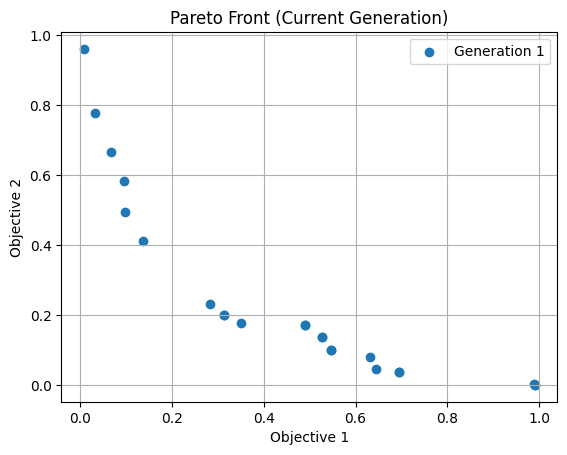

Generation 2: Evaluated 77 individuals.


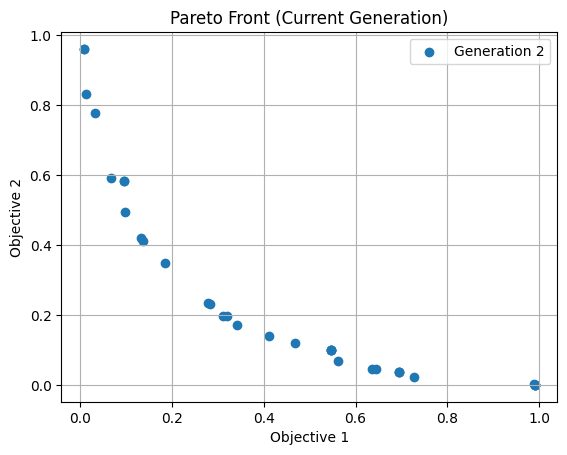

Generation 3: Evaluated 76 individuals.


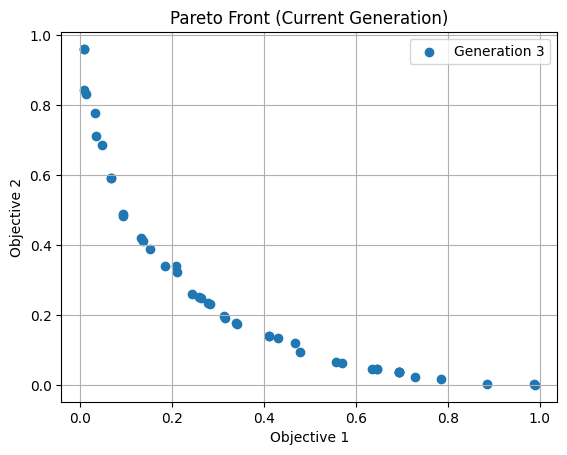

Generation 4: Evaluated 83 individuals.


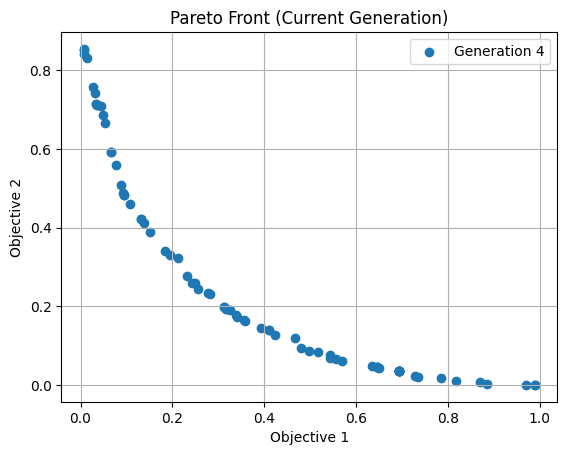

Generation 5: Evaluated 81 individuals.


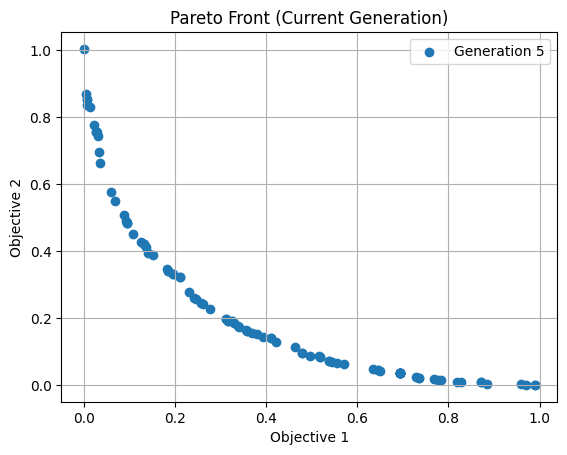

Generation 6: Evaluated 76 individuals.


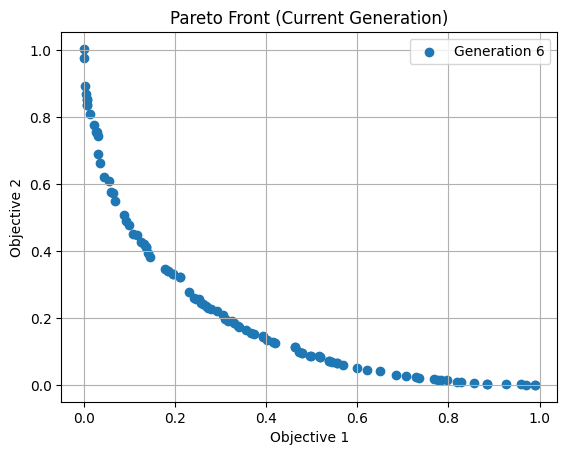

Generation 7: Evaluated 72 individuals.


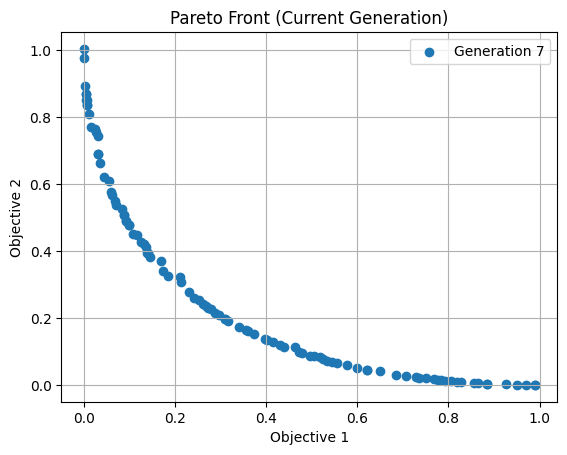

Generation 8: Evaluated 77 individuals.


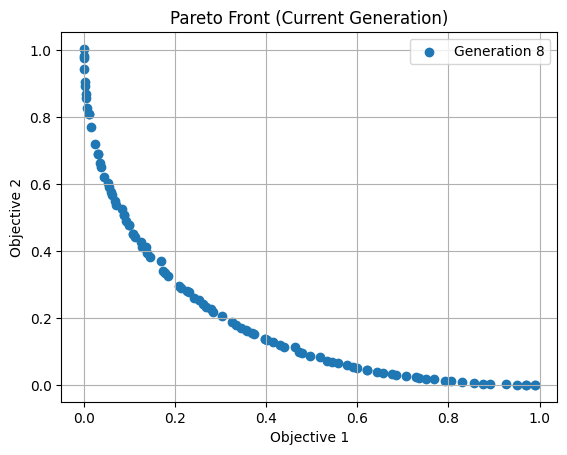

Generation 9: Evaluated 88 individuals.


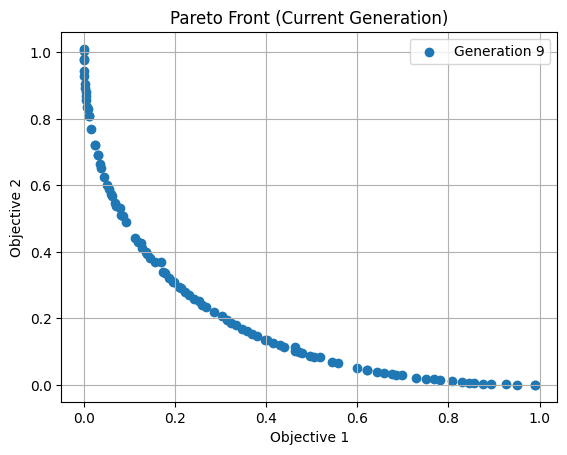

Generation 10: Evaluated 75 individuals.


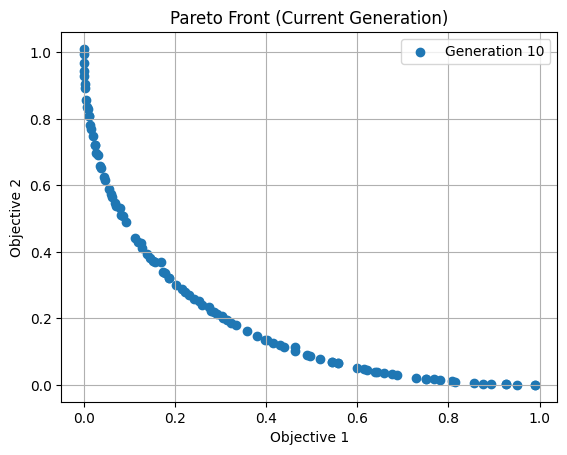

Generation 11: Evaluated 62 individuals.


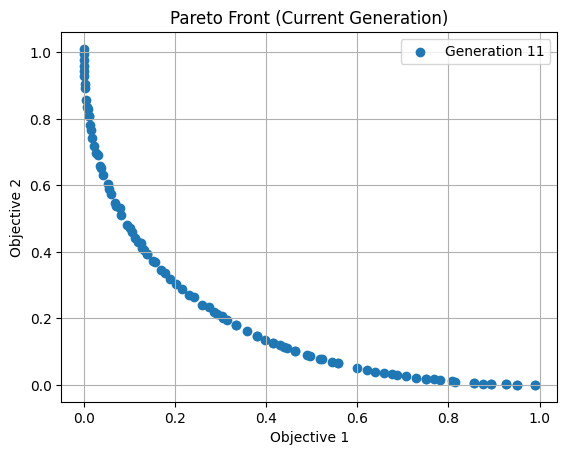

Generation 12: Evaluated 74 individuals.


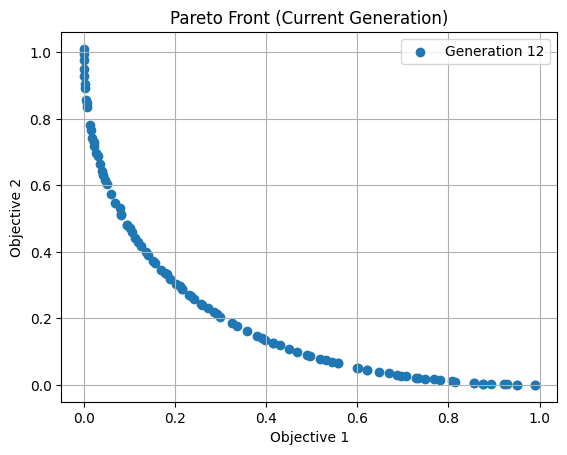

Generation 13: Evaluated 74 individuals.


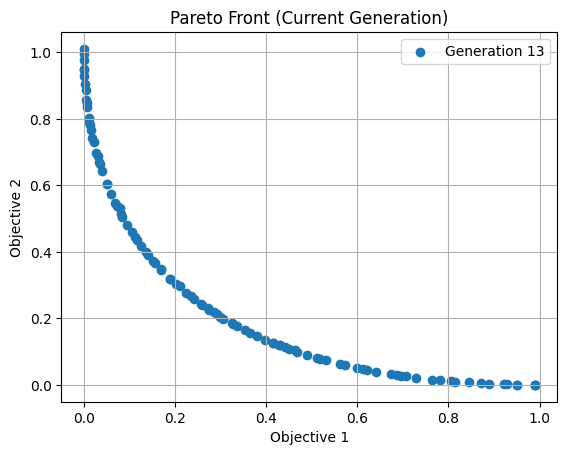

Generation 14: Evaluated 71 individuals.


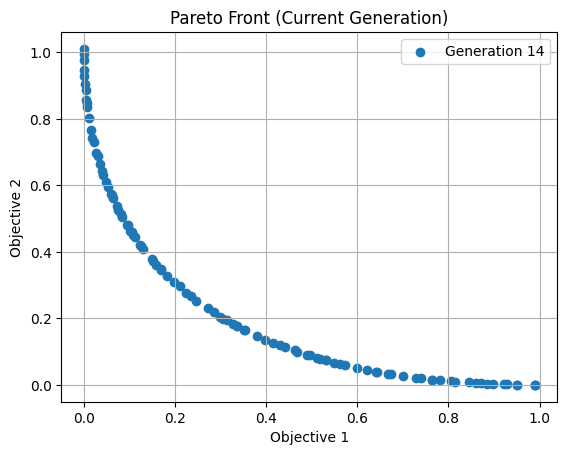

Generation 15: Evaluated 75 individuals.


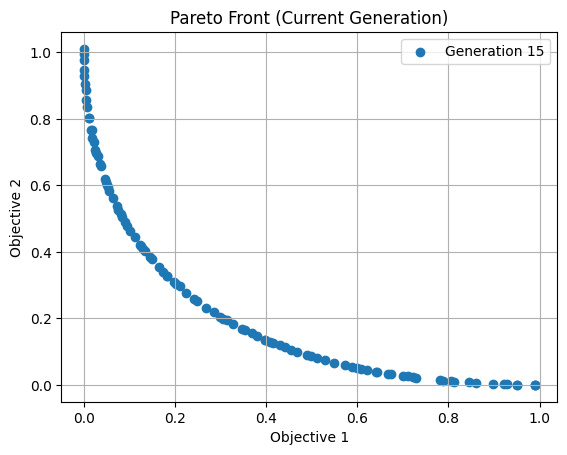

Generation 16: Evaluated 85 individuals.


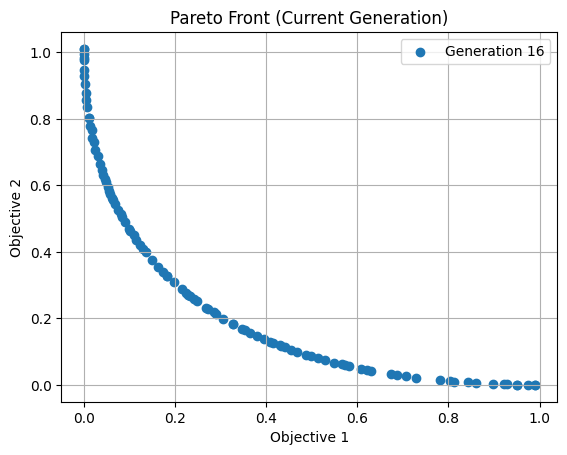

Generation 17: Evaluated 74 individuals.


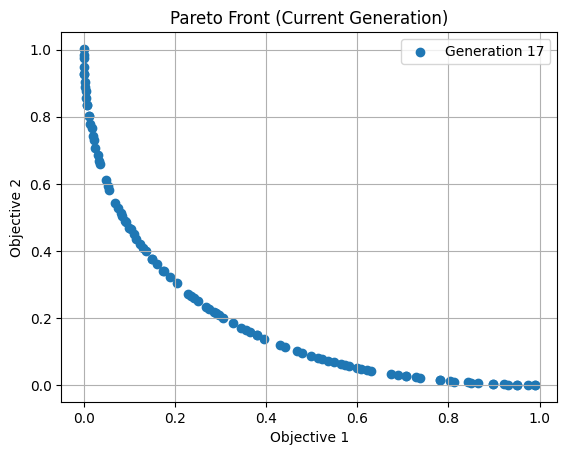

Generation 18: Evaluated 73 individuals.


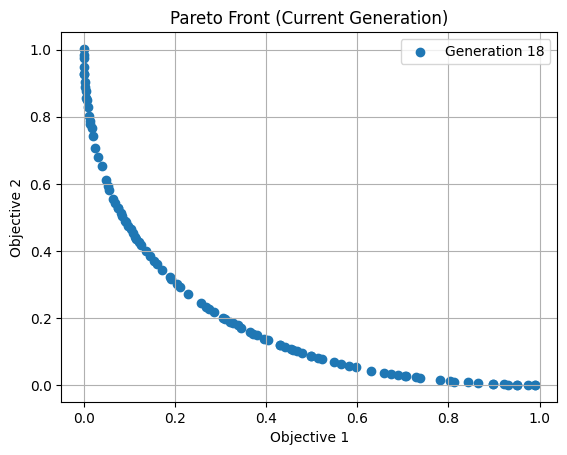

Generation 19: Evaluated 70 individuals.


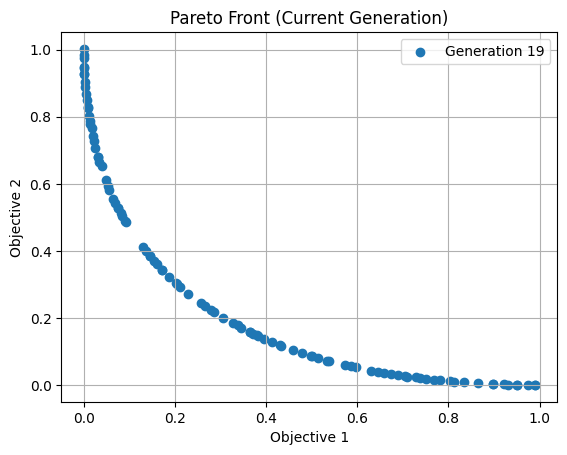

Generation 20: Evaluated 74 individuals.


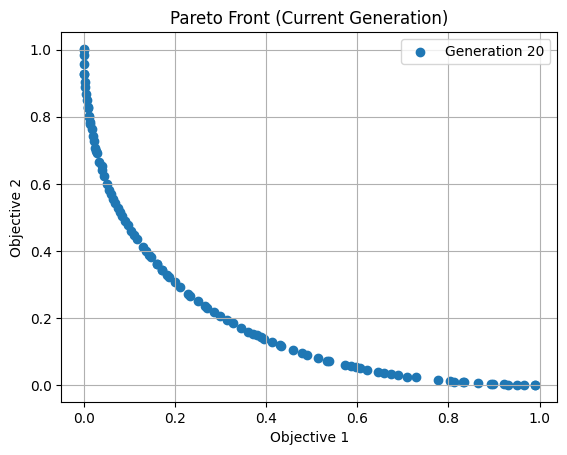

Generation 21: Evaluated 91 individuals.


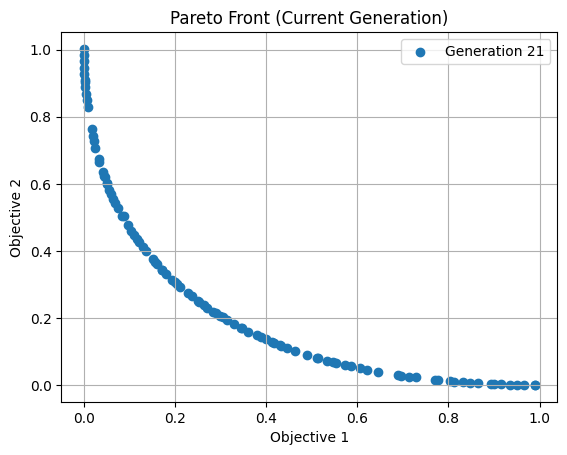

Generation 22: Evaluated 85 individuals.


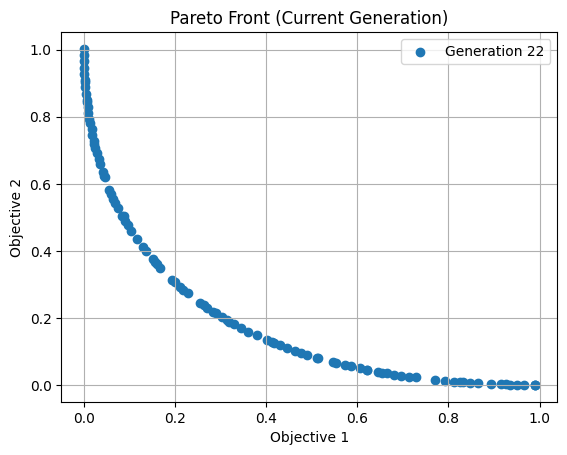

Generation 23: Evaluated 73 individuals.


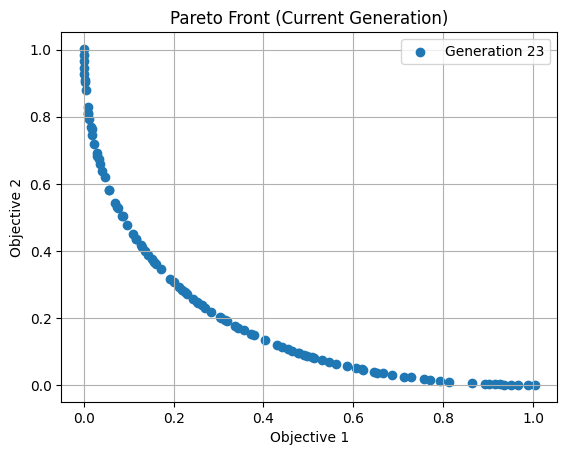

Generation 24: Evaluated 62 individuals.


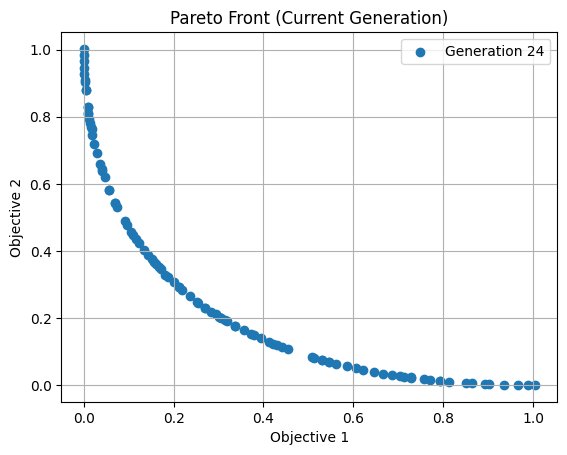

Generation 25: Evaluated 77 individuals.


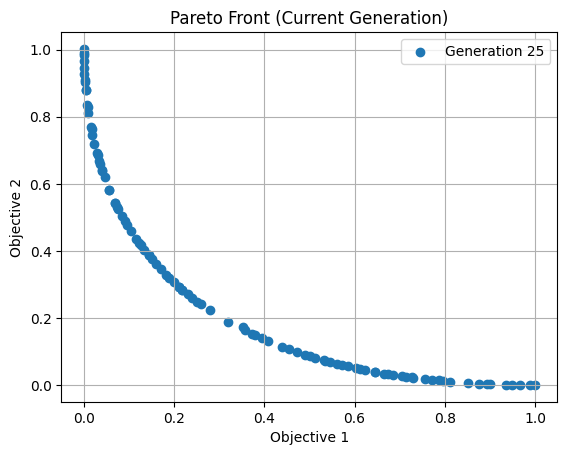

Generation 26: Evaluated 74 individuals.


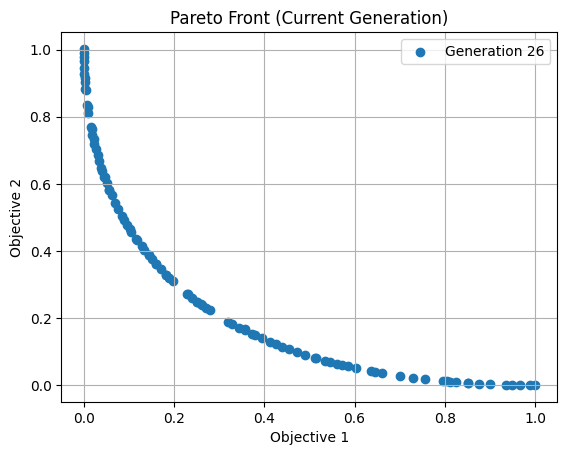

Generation 27: Evaluated 90 individuals.


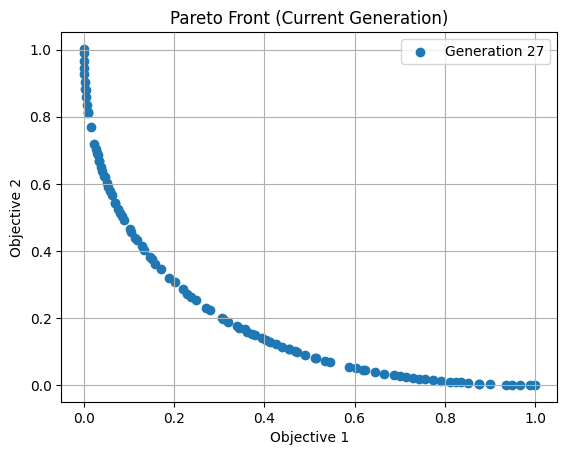

Generation 28: Evaluated 73 individuals.


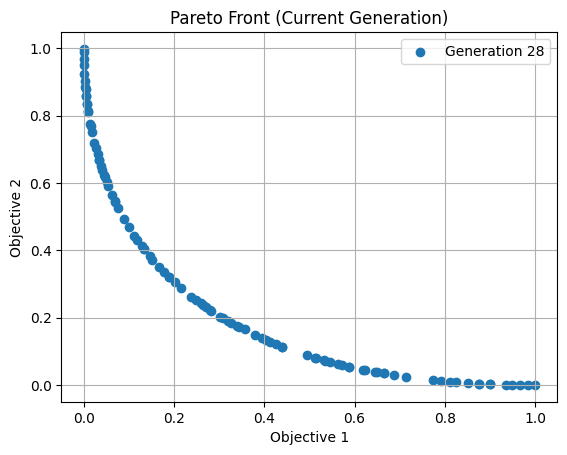

Generation 29: Evaluated 78 individuals.


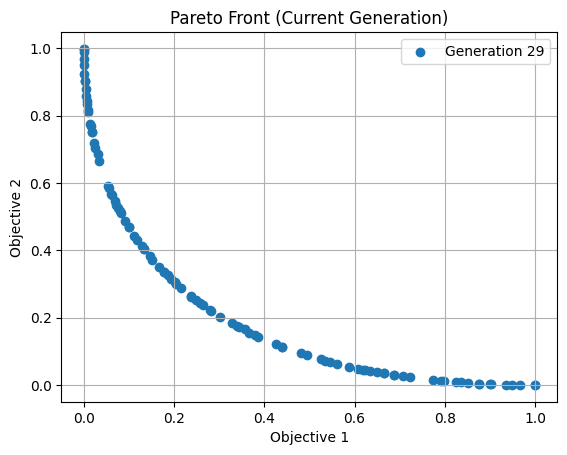

Generation 30: Evaluated 74 individuals.


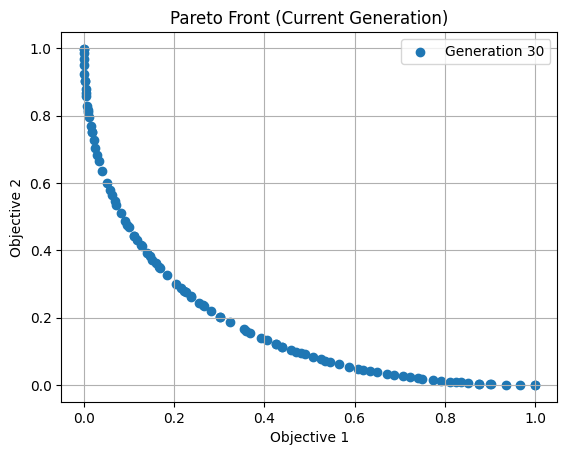

Generation 31: Evaluated 84 individuals.


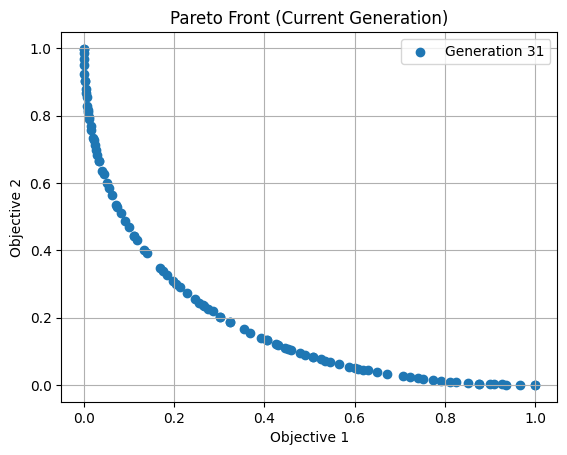

Generation 32: Evaluated 82 individuals.


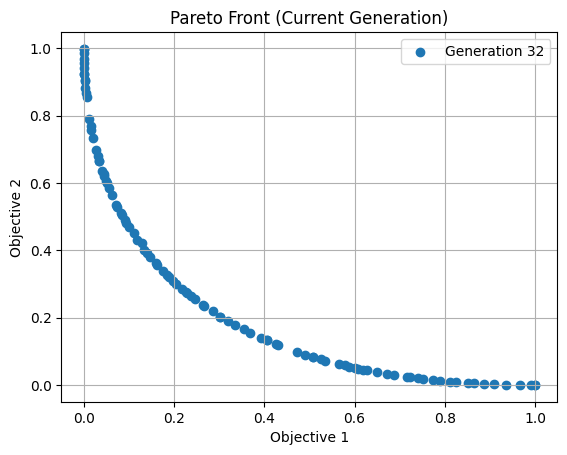

Generation 33: Evaluated 83 individuals.


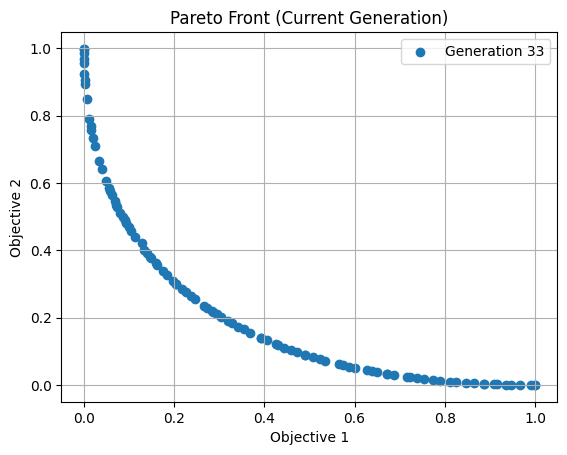

Generation 34: Evaluated 79 individuals.


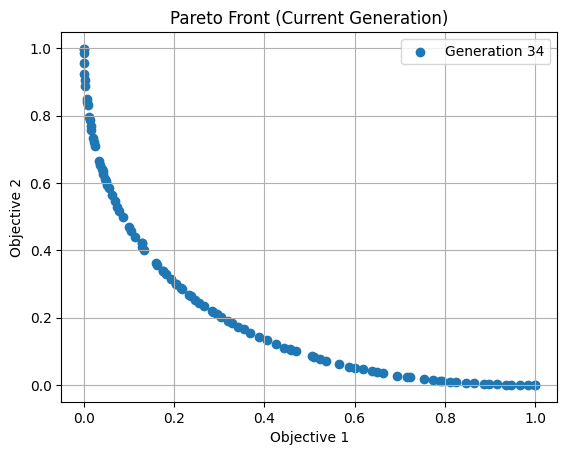

Generation 35: Evaluated 76 individuals.


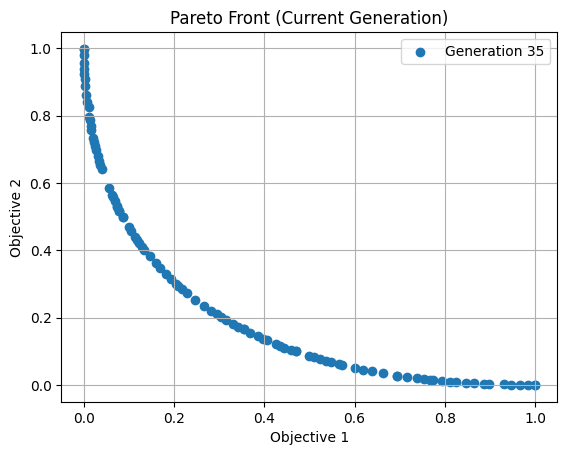

Generation 36: Evaluated 83 individuals.


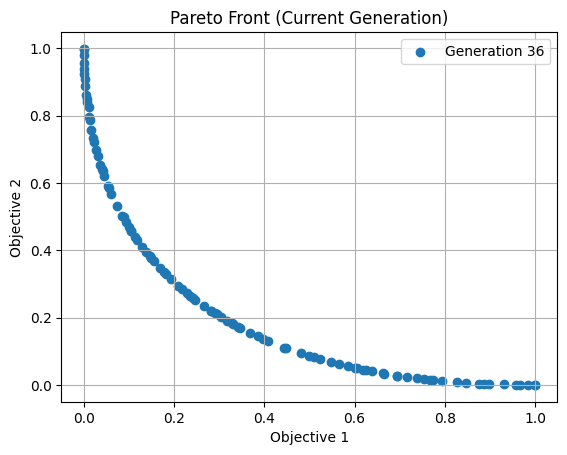

Generation 37: Evaluated 74 individuals.


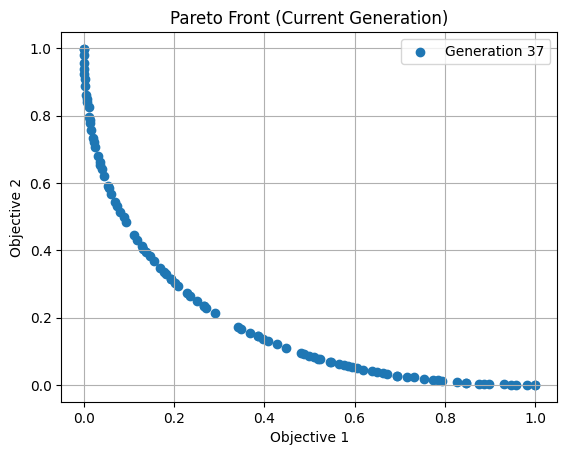

Generation 38: Evaluated 75 individuals.


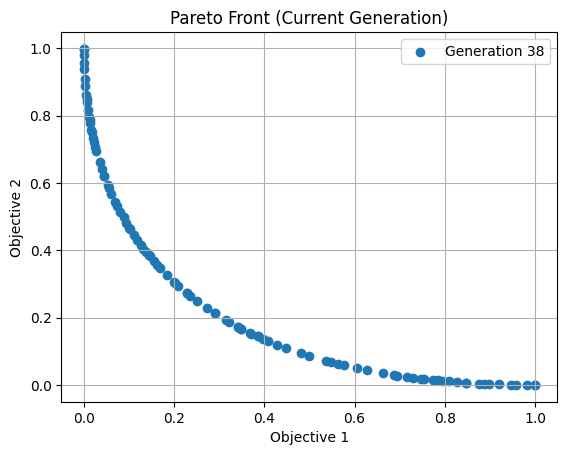

Generation 39: Evaluated 78 individuals.


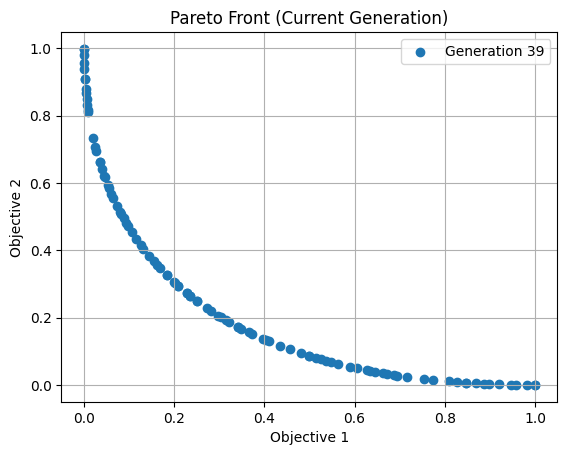

Generation 40: Evaluated 68 individuals.


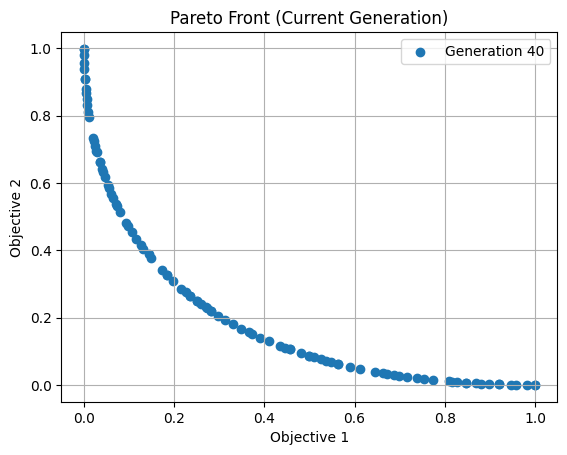

Generation 41: Evaluated 75 individuals.


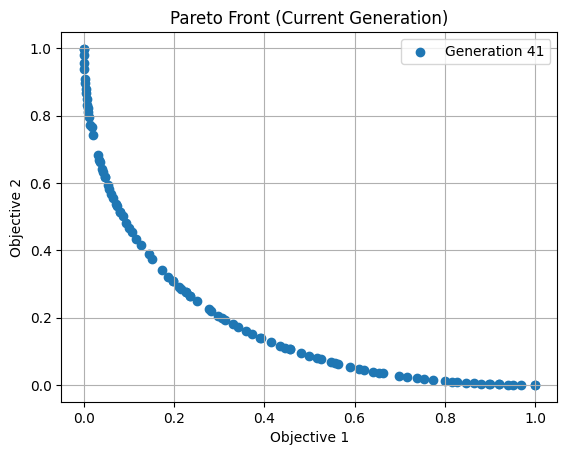

Generation 42: Evaluated 77 individuals.


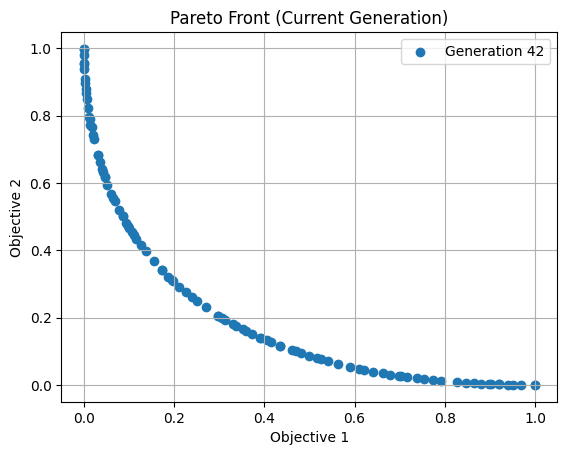

Generation 43: Evaluated 79 individuals.


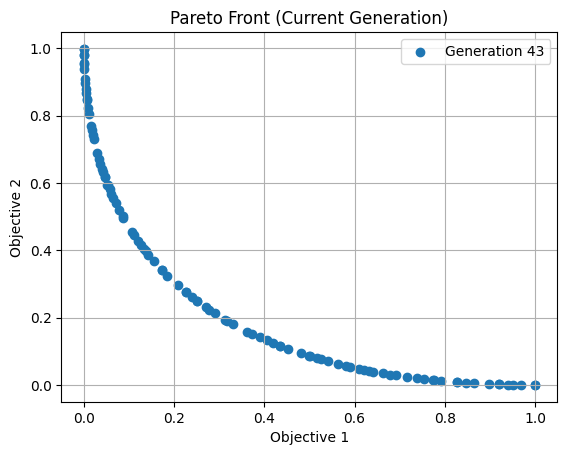

Generation 44: Evaluated 74 individuals.


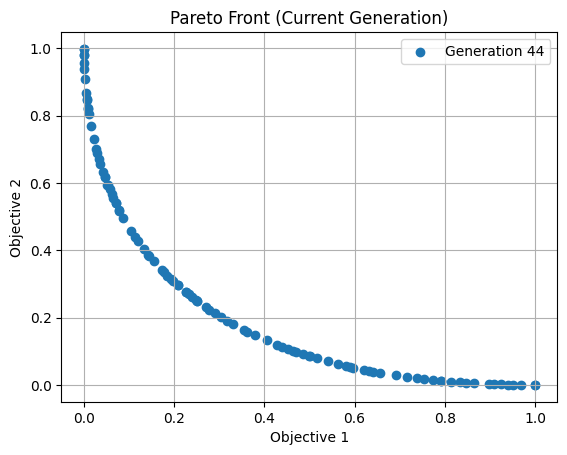

Generation 45: Evaluated 65 individuals.


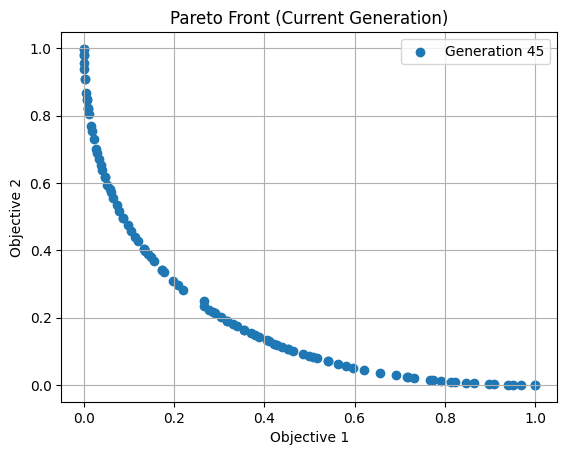

Generation 46: Evaluated 64 individuals.


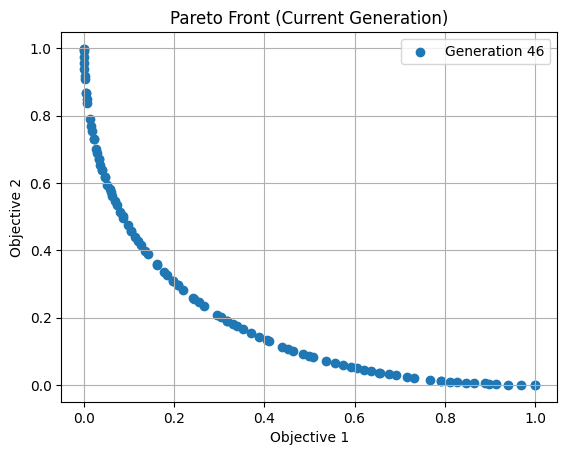

Generation 47: Evaluated 79 individuals.


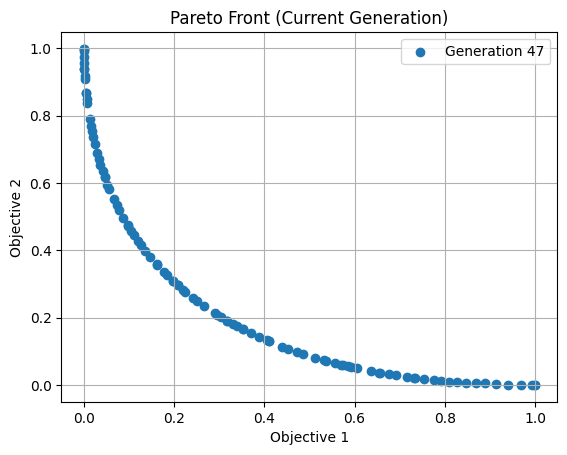

Generation 48: Evaluated 89 individuals.


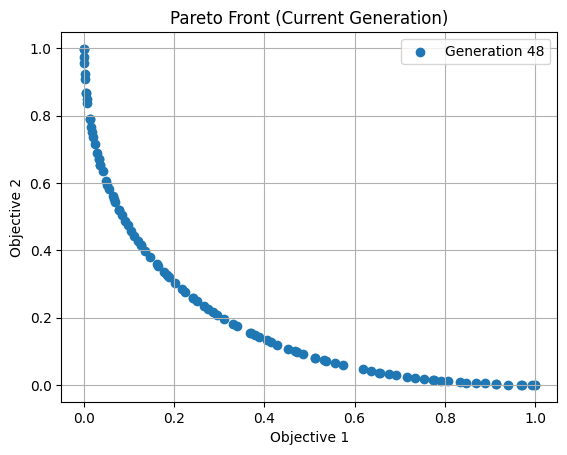

Generation 49: Evaluated 57 individuals.


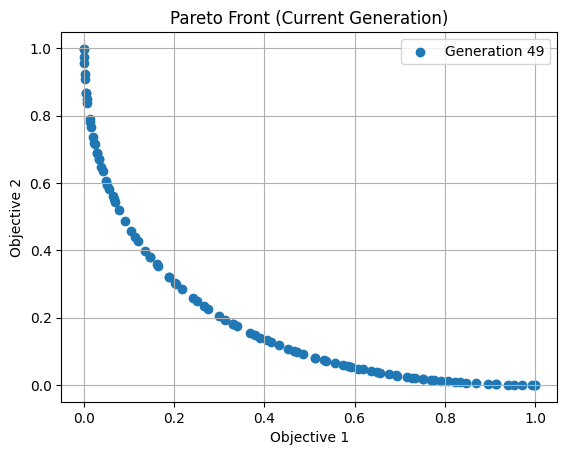

Generation 50: Evaluated 82 individuals.


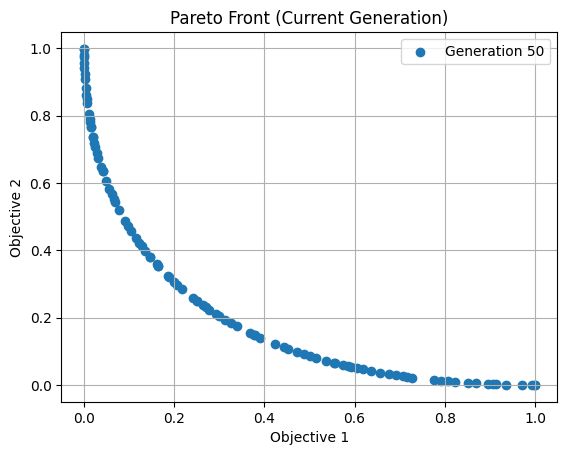

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 定义优化问题（双目标：最小化f1和f2）
def evaluate(individual):
    x = individual[0]
    y = individual[1]
    # 示例目标函数
    f1 = x**2 + y**2  # 最小化目标1
    f2 = (x - 1)**2 + y**2  # 最小化目标2
    return f1, f2

# 初始化DEAP环境
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # 双目标最小化
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# 定义个体和种群
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册操作
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# 可视化函数
def plot_front(population, gen, title):
    """绘制当前代非支配排序的第一等级前沿"""
    fronts = tools.sortNondominated(population, len(population), first_front_only=True)[0]
    fitnesses = [ind.fitness.values for ind in fronts]
    plt.scatter(*zip(*fitnesses), marker='o', label=f"Generation {gen}")
    plt.title(title)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

# 主函数
def main():
    random.seed(42)
    
    # 参数设置
    pop_size = 100
    generations = 50
    mutation_prob = 0.2
    crossover_prob = 0.7

    # 初始化种群
    population = toolbox.population(n=pop_size)

    # 计算初始种群适应度
    fitnesses = map(toolbox.evaluate, population)
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # 记录过程信息
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals", "fronts"]

    # 演化过程
    for gen in range(1, generations + 1):
        # 选择父代
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # 交叉和变异
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossover_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < mutation_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # 重新评估适应度
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # 更新种群
        population = toolbox.select(population + offspring, pop_size)

        # 获取非支配排序的第一前沿
        fronts = tools.sortNondominated(population, len(population), first_front_only=True)[0]

        # 记录并绘制当前代的前沿
        logbook.record(gen=gen, nevals=len(invalid_ind), fronts=len(fronts))
        print(f"Generation {gen}: Evaluated {len(invalid_ind)} individuals.")
        plot_front(population, gen, title="Pareto Front (Current Generation)")

    # 返回最后一代的种群和前沿
    final_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]
    return population, final_front, logbook

# 执行主函数
if __name__ == "__main__":
    pop, front, logs = main()


In [8]:
import random

# 生成 1 到 10 之间的随机整数（包括 1 和 10）
rand_num = random.randint(0, 1)
print(rand_num)

# 在负数范围内生成随机整数
negative_rand = random.randint(-10, -1)
print(negative_rand)


0
-5
